### Monitor Data Quality Trends Over Time

**Task 1**: Create a Trends Analysis Report

**Objective**: Understand long-term data quality trends.

**Steps**:
1. Use historical data (or simulate data) to analyze how data quality has changed over time.
2. Calculate trends for the KPIs defined earlier using statistical measures or visual charts.
3. Write a report summarizing your findings, noting any persistent issues or improvements.

Completeness trend over time: increasing (slope=0.0079, p-value=0.9789)
Accuracy trend over time: increasing (slope=0.4129, p-value=0.3347)
Timeliness trend over time: decreasing (slope=-0.4787, p-value=0.5438)


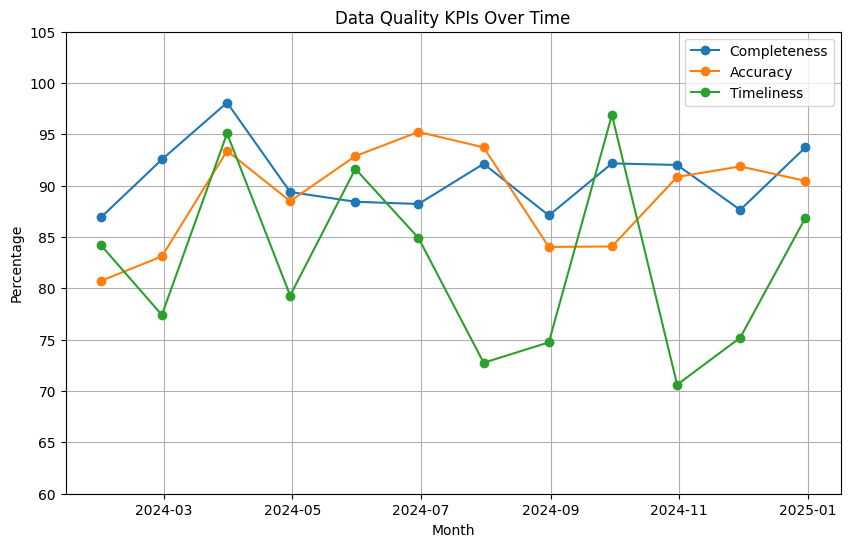

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulate historical KPI data (e.g., for 12 months)
months = pd.date_range(start='2024-01-01', periods=12, freq='M')
data = {
    'Completeness': np.random.uniform(85, 100, size=12),  # in %
    'Accuracy': np.random.uniform(80, 100, size=12),      # in %
    'Timeliness': np.random.uniform(70, 100, size=12)     # in %
}

df = pd.DataFrame(data, index=months)
df.index.name = 'Month'

# Function to calculate and print trend using linear regression
def calculate_trend(series, name):
    x = np.arange(len(series))
    slope, intercept, r_value, p_value, std_err = linregress(x, series)
    trend = "increasing" if slope > 0 else "decreasing"
    print(f"{name} trend over time: {trend} (slope={slope:.4f}, p-value={p_value:.4f})")
    return slope, p_value

# Calculate trends for each KPI
for kpi in df.columns:
    calculate_trend(df[kpi], kpi)

# Plot KPIs over time
plt.figure(figsize=(10,6))
for col in df.columns:
    plt.plot(df.index, df[col], marker='o', label=col)
plt.title("Data Quality KPIs Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.ylim(60, 105)
plt.legend()
plt.grid(True)
plt.show()


**Task 2**: Evaluate Continuous Improvement Measures

**Objective**: Implement strategic changes based on trend analysis.

**Steps**:
1. Identify patterns or recurring issues from your trend analysis report.
2. Propose three continuous improvement strategies to address these issues.
3. Plan how to implement these strategies and measure their effectiveness over the next cycle.

In [2]:
import pandas as pd

# Simulated KPI trend data (monthly records)
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Completeness': [0.98, 0.95, 0.93, 0.90, 0.88, 0.85],
    'Accuracy': [0.96, 0.95, 0.92, 0.94, 0.90, 0.89],
    'Timeliness': [0.85, 0.87, 0.90, 0.88, 0.86, 0.90]
}

df_trends = pd.DataFrame(data)

# 1. Identify recurring issues (e.g., decreasing trends)
issues = {}
if df_trends['Completeness'].iloc[-1] < 0.9:
    issues['Completeness'] = "Decreasing completeness with increasing missing data."
if df_trends['Accuracy'].min() < 0.9:
    issues['Accuracy'] = "Accuracy fluctuates with occasional dips below target."
if df_trends['Timeliness'].min() < 0.85:
    issues['Timeliness'] = "Timeliness inconsistent, occasional delays."

print("Identified Data Quality Issues:")
for k, v in issues.items():
    print(f"- {k}: {v}")

# 2. Propose improvement strategies based on issues
strategies = {
    'Completeness': "Implement automated validation scripts at data ingestion points.",
    'Accuracy': "Conduct regular data quality training for data entry personnel.",
    'Timeliness': "Deploy real-time dashboards with alerting on delays."
}

# 3. Implementation plan and measurement method
implementation_plan = pd.DataFrame({
    'Strategy': list(strategies.values()),
    'Implementation_Plan': [
        "Develop and integrate validation scripts within 2 months.",
        "Schedule quarterly training sessions with pre/post assessments.",
        "Set up dashboards and alerts using BI tools within 1 month."
    ],
    'Measurement_Method': [
        "Monitor completeness monthly; target >95%.",
        "Track accuracy improvements after training sessions.",
        "Track timeliness daily; target <5% late records."
    ]
})

print("\nContinuous Improvement Plan:")
print(implementation_plan)

# Save report if needed
# implementation_plan.to_csv("improvement_plan.csv", index=False)


Identified Data Quality Issues:
- Completeness: Decreasing completeness with increasing missing data.
- Accuracy: Accuracy fluctuates with occasional dips below target.

Continuous Improvement Plan:
                                            Strategy  \
0  Implement automated validation scripts at data...   
1  Conduct regular data quality training for data...   
2  Deploy real-time dashboards with alerting on d...   

                                 Implementation_Plan  \
0  Develop and integrate validation scripts withi...   
1  Schedule quarterly training sessions with pre/...   
2  Set up dashboards and alerts using BI tools wi...   

                                  Measurement_Method  
0         Monitor completeness monthly; target >95%.  
1  Track accuracy improvements after training ses...  
2   Track timeliness daily; target <5% late records.  
